## Planning Architecture

### Non-deterministic Filter
At time step $t$, given estimates of bounding boxes of obstacles, we have:
$\hat{\mathcal X_t}$ = estimate of the occupied space in the environment.

With estimate from the previous time step, update the estimate as: 
$\bar{\mathcal X_t}=\bar{\mathcal X}_{t-1}\cap\hat{\mathcal X_t}$

### Planning
Plan path to goal for time step $t$, ensuring that we do not enter the ICS at time step $t+1$.
- Simple planning (FMT*) if there is a collision free path to goal
- Optimistic plan if there is no collision free path to goal (?)
    - Replan at next time step
        - Brake if no more plan

- Choice of U: all unobserved space is free space (implemented in our filter)
- Choice of ICS: figure out on Go1
- Choice of intermediate goal: implement or just long-term goal -> no need to use
- Choice of solver: FMT*

## Map

In [91]:
import numpy as np
from plan_func import box_to_occ_space, non_det_filter, occ_to_map
A1x = 0.1;A1y = 0.1;A1z = 0.1;A2x=0.2;A2y=0.2;A2z=0.2
B1x = 0.3;B1y = 0.3;B1z = 0.3;B2x=0.4;B2y=0.8;B2z=0.8
C1x = 0.35;C1y = 0.6;C1z = 0.6;C2x=0.45;C2y=0.7;C2z=0.7
D1x = 0.15;D1y = 0.15;D1z = 0.4;D2x=0.7;D2y=0.5;D2z=0.5
A = np.array([[A1x,A1y],[A2x,A2y]])
B = np.array([[B1x,B1y],[B2x,B2y]])
C = np.array([[C1x,C1y],[C2x,C2y]])
D = np.array([[D1x,D1y],[D2x,D2y]])

occ_space = box_to_occ_space(A,B,C,D)

xbar_prev = box_to_occ_space(A, B)
xhat_now = box_to_occ_space(C, D)
xbar_now = non_det_filter(xbar_prev, xhat_now)

map_design = occ_to_map(xbar_now,1,1,0.01) # convert to map
# map_design is image format, 1 = free, 0 = obstacle

## Safety Planner
- ICS includes left turn and right turn
- Plans for intermediate goal

In [ ]:
import numpy as np
from safety_planner import Safety_Planner

In [2]:
xbar_now = np.array([[[0.15, 0.15],[0.2 , 0.2 ]],
                     [[0.35, 0.6 ],[0.4 , 0.7 ]],
                     [[0.3 , 0.3 ],[0.4 , 0.5 ]]])
# import matplotlib.pyplot as plt
# from matplotlib.patches import Rectangle
# plt.rcParams['figure.figsize'] = [4,3]
# from plan_func import *

In [90]:
safe_planner = Safety_Planner(xbar_now,[0.45,0.1,np.pi/2],[0.2,1,np.pi/2])
safe_planner.plan()

Reached goal


{'path': array([[ 45.        ,  10.        ,   1.57079633],
        [ 45.05527639,  16.91749945,   0.51138909],
        [ 48.16370282,  21.25342021,   1.31681681],
        [ 49.43232216,  40.60483605,   0.66571712],
        [ 52.3996071 ,  44.03625885,   2.10327785],
        [ 43.29305855,  58.31126288,   2.19174828],
        [ 40.23031731,  72.99006201,   2.79032708],
        [ 33.8338649 ,  74.27507415,   1.88807123],
        [ 28.44021287,  91.52241577,   2.55971431],
        [ 20.        , 100.        ,   1.57079633]]),
 'n_steps': 763,
 'cost': 104.66744521134355,
 'goal_flag': 1}

In [3]:
from plan_func import *
map_design = occ_to_map(xbar_now,safe_planner.w,safe_planner.h,safe_planner.dx) # convert to map
planner = FMTPlanner(map_design)
planner_dynamic = FMTPlanner_dynamics(map_design)

In [8]:
planner_dynamic.plan([0.25,0.1,1.57],[0.6,0.8, 1.57])

Reached goal


{'path': array([[0.25      , 0.1       , 1.57      ],
        [0.25      , 0.1       , 0.7       ],
        [0.30372182, 0.20827787, 0.9612305 ],
        [0.36442534, 0.25518162, 0.61092685],
        [0.44618474, 0.34519725, 0.66541138],
        [0.45610057, 0.45057201, 0.98243575],
        [0.47053519, 0.51735949, 0.91440496],
        [0.54286776, 0.65390151, 0.95330382],
        [0.6       , 0.8       , 1.57      ]]),
 'n_steps': 67,
 'cost': 0.804748498583836,
 'goal_flag': 1}

In [13]:
goal_inter(occ_space=xbar_now, world_box=np.array([[0,0],[1,1]]), 
           planner_dynamic=planner_dynamic, planner=planner,
           start = [0.25,0.1,1.57], goal = [0.6,0.8,1.57], radius = 0.1, FoV = 1.57)

[0.32073882691672, 0.17068251811053659, 1.57]
Search failed
2000
Reached goal
0.6884964021718232
[0.46221648075016, 0.3120475543316098, 1.57]
Search failed
2000
Reached goal
0.507032432306489
[0.6036941345836, 0.453412590552683, 1.57]
Search failed
2000
Reached goal
0.3466070960290974
[0.7451717884170399, 0.5947776267737562, 1.57]
Search failed
2000
Reached goal
0.2513783415985027
[0.8866494422504799, 0.7361426629948293, 1.57]
Search failed
2000
Reached goal
0.29367611791206855
[0.15527864045000422, 0.2894427190999916, 1.57]
Search failed
2000
Reached goal
0.6770862756842785
[0.06583592135001262, 0.4683281572999748, 1.57]
Search failed
2000
Reached goal
0.6287586772045537
[0.46, 0.38, 1.57]
Search failed
2000
Reached goal
0.4427188724235731
[0.5800000000000001, 0.54, 1.57]
Search failed
2000
Reached goal
0.260768096208106
[0.7000000000000001, 0.7, 1.57]
Search failed
2000
Reached goal
0.14142135623730964
[0.8200000000000001, 0.8600000000000001, 1.57]
Search failed
2000
Reached goal
0.2

array([0.7, 0.7])

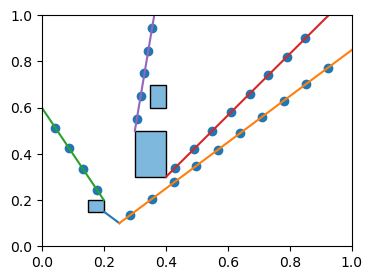

In [ ]:
plot_frontier(xbar_now, np.array([[0,0],[1,1]]), [0.25,0.1,np.pi/2], np.pi/2)

## Trajectory Stuff

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
k1= 0.1;k2= 0.2
A = np.array([[0,0,1,0],[0,0,0,1],[0,0,-k1,0],[0,0,0,-k2]])
B = np.array([[0,0],[0,0],[k1,0],[0,k2]])
R = np.array([[0.1,0],[0,0.1]])

# state = [x,y,vx,vy]
# control = [ux,uy] # velocity

# now want to generate optimal trajectory + controls between state0 and state1

In [57]:
tau = 1
def g(t,dt):
    G = np.zeros((4,4))
    for t_prime in np.arange(0,t,dt):
        G += dt*scipy.linalg.expm(A*t_prime)@B@B.T@scipy.linalg.expm(A.T*t_prime)
    return G

def d(t,dt,s0,s1):
    sbar = scipy.linalg.expm(A*t)@s0
    return scipy.linalg.inv(g(t,dt))@(s1-sbar)

d(1,0.1,np.array([0,0,0,0]),np.array([1,1,0,0]))

array([13.3341123 ,  4.23964351, -5.23427559, -1.2759901 ])

In [20]:
from scipy.integrate import quad_vec
from scipy.linalg import expm

In [21]:
def gramian(t):
    def integrand(s):
        return expm(A*s)@B@R@B.T@expm(A.T*s)
    return quad_vec(integrand, 0, t)[0]

def d(t,s0,s1):
    return scipy.linalg.inv(gramian(t))@(s1 - expm(A*t)@s0)

In [22]:
# turn julia code into python syntax
def gen_trajectory(s0, s1, tau, dt):
    
    # integrating directly
    # in RRT* paper, they use Runge-Kutta to solve ODE
    # G = np.zeros((4,4))
    # for t_prime in np.arange(0,tau,dt):
    #     G += dt*scipy.linalg.expm(A*t_prime)@B@B.T@scipy.linalg.expm(A.T*t_prime)
    
    sbar = expm(A*tau)@s0
    d = scipy.linalg.inv(gramian(tau))@(s1 - expm(A*tau)@s0)
    
    block_mat = scipy.sparse.bmat([[A,B@B.T],[None,-A.T]]).toarray()
    block_vec = np.hstack([s1,d])
    
    def f(t):
        return scipy.linalg.expm(block_mat*(t-tau))@(block_vec)
    
    waypoints = []
    for t_prime in np.arange(0,tau,dt):
        waypoints.append(f(t_prime))
    
    x_waypoints = [waypoint[0:4] for waypoint in waypoints]
    u_waypoints = [B.T@waypoint[4:] for waypoint in waypoints]

    return x_waypoints,u_waypoints


In [65]:
np.hstack([np.array([1,2,3]),np.array([4,5,6])]).T

array([1, 2, 3, 4, 5, 6])

In [28]:
gen_trajectory(np.array([0,0,0,0]),np.array([1,5,1.5,0.1]),1,0.1)

([array([-2.22044605e-16, -3.55271368e-15,  6.66133815e-16,  7.10542736e-15]),
  array([0.01450587, 0.13916548, 0.28510235, 2.68400367]),
  array([0.05601792, 0.51695626, 0.54012797, 4.7726652 ]),
  array([0.12152976, 1.07388189, 0.76510235, 6.2668201 ]),
  array([0.20803743, 1.75052358, 0.96004798, 7.16706605]),
  array([0.31253905, 2.48751041, 1.12498438, 7.47376315]),
  array([0.43203455, 3.2254956 , 1.25992802, 7.18703409]),
  array([0.56352535, 3.90513279, 1.3648924 , 6.30676416]),
  array([0.70401408, 4.46705227, 1.43988803, 4.83260127]),
  array([0.85050425, 4.85183722, 1.48492239, 2.76395571])],
 [array([ 30.01499774, 149.10063728]),
  array([ 27.29105072, 121.9926797 ]),
  array([24.53972757, 94.33710505]),
  array([21.76075317, 66.12285073]),
  array([18.95384961, 37.33863067]),
  array([16.1187362 ,  7.97293079]),
  array([ 13.25512943, -21.98599558]),
  array([ 10.36274293, -52.55013241]),
  array([  7.44128746, -83.73170576]),
  array([   4.49047088, -115.54318867])])

In [39]:
def show_trajectory(s0, s1, tau, dt, c_='gray', linewidth_=0.5):
    x_waypoints,_ = gen_trajectory(s0, s1, tau, dt)
    M = np.zeros((4, int(np.ceil(tau/dt))))
    for i in range(len(x_waypoints)):
        M[:, i] = x_waypoints[i]
    # print(M)
    plt.plot(M[0, :], M[1, :], c=c_, linewidth=linewidth_)
    plt.show()

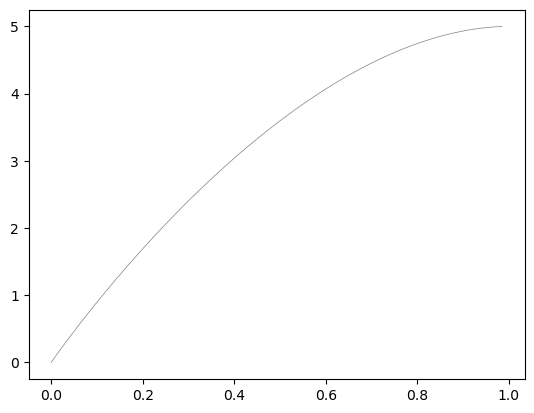

In [40]:
show_trajectory(np.array([0,0,0,0]),np.array([1,5,1.5,0.1]),1,0.01)

## Dynamics

In [ ]:
def go1_yaw_dynamics_forward(state_t,u,dt):
    # state_t: [x_t, y_t, psi_t]
    state_t1 = np.zeros(3)
    state_t1[0] = state_t[0] + u[0]*np.cos(state_t[2])*dt
    state_t1[1] = state_t[1] + u[0]*np.sin(state_t[2])*dt
    state_t1[2] = state_t[2] + u[1]*dt
    return state_t1

def go1_yaw_dynamics_backward(state_t,u,dt):
    state_t1 = np.zeros(3)
    state_t1[2] = state_t[2] - u[1]*dt
    state_t1[1] = state_t[1] - u[0]*np.sin(state_t1[2])*dt
    state_t1[0] = state_t[0] - u[0]*np.cos(state_t1[2])*dt
    return state_t1

In [19]:
from scipy.integrate import quad_vec
import numpy as np
from scipy.linalg import expm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

k1= 0.1;k2= 0.2
A = np.array([[0,0,1,0],[0,0,0,1],[0,0,-k1,0],[0,0,0,-k2]])
B = np.array([[0,0],[0,0],[k1,0],[0,k2]])
R = np.array([[0.1,0],[0,0.1]])

In [20]:
def forward_box_time(state, dt, ux_range, uy_range):
    # state = [x,y,vx,vy]
    # control = [ux,uy] # velocity
    # ux_range = [ux_min, ux_max]
    # uy_range = [uy_min, uy_max]
    scale = 0.01 # TODO: arbitrary
    state1_min = state + (A@state+B@np.array([min(ux_range),min(uy_range)]))*dt
    state1_max = state + (A@state+B@np.array([max(ux_range),max(uy_range)]))*dt

    def join(xmin,xmax):
        return np.array([min(xmin,xmax)-scale,max(xmin,xmax)+scale])

    # x1 = state[0] + state[2]*dt + np.array([-1,1])*scale
    # y1 = state[1] + state[3]*dt + np.array([-1,1])*scale
    # vx1 = state[2] - k1*state[2]*dt + k1*ux_range*dt
    # vy1 = state[3] - k2*state[3]*dt + k2*uy_range*dt
    return join(state1_min[0],state1_max[0]),join(state1_min[1],state1_max[1]),join(state1_min[2],state1_max[2]),join(state1_min[3],state1_max[3])

forward_box_time(np.array([0,0,0,0]),10,np.array([0,1]),np.array([0,1]))

(array([-0.01,  0.01]),
 array([-0.01,  0.01]),
 array([-0.01,  1.01]),
 array([-0.01,  2.01]))

In [21]:
def backward_box_time(state, dt, ux_range,uy_range):
    # state = [x,y,vx,vy]
    # control = [ux,uy] # velocity
    # ux_range = [ux_min, ux_max]
    # uy_range = [uy_min, uy_max]
    scale = 0.01 # TODO: arbitrary, to avoid finding no point at all
    vx1 = (state[2] - k1*ux_range*dt)/(1-k1*dt)
    vy1 = (state[3] - k2*uy_range*dt)/(1-k2*dt)
    x1 = state[0] - vx1*dt + np.array([-1,1])*scale
    y1 = state[1] - vy1*dt + np.array([-1,1])*scale
    return x1,y1,vx1,vy1

backward_box_time(np.array([0,0,0.05,0.1]),1,np.array([0,1]),np.array([0,1]))

(array([-0.06555556,  0.06555556]),
 array([-0.135,  0.135]),
 array([ 0.05555556, -0.05555556]),
 array([ 0.125, -0.125]))

In [22]:
def forward_box(state, r, u_range):
    umax = max(u_range)
    umin = min(u_range)
    xmax,ymax = state[0:2] + r*np.array([umax,umax])
    xmin,ymin = state[0:2] + r*np.array([umin,umin])
    return xmax,ymax,xmin,ymin
forward_box(np.array([0,0,0,0]),5,np.array([-1,1]))

(5, 5, -5, -5)

In [23]:
def backward_box(state, r, u_range):
    umax = max(u_range)
    umin = min(u_range)
    xmax,ymax = state[0:2] - r*np.array([umin,umin])
    xmin,ymin = state[0:2] - r*np.array([umax,umax])
    return xmax,ymax,xmin,ymin

In [24]:
def gramian(t):
    def integrand(s):
        return expm(A*s)@B@np.linalg.inv(R)@B.T@expm(A.T*s)
    return quad_vec(integrand, 0, t)[0]

In [25]:
def cost_optimal(state0, state1):
    def cost(t):
        x = state1-expm(A*t)@state0
        c =t+x.T@np.linalg.inv(gramian(t))@x
        return c
    t_star = minimize(cost, 1).x[0]
    return cost(t_star), t_star

In [26]:
state0 = np.array([0,0,0,0])
state1 = np.array([0,0,0.1,0.2])
cost_optimal(state0, state1)

(1.81945035541156, 0.8941319805294646)

In [31]:
def filter_reachable(state: int, state_set: list, r, u_range, direction: str):
    """
    Filter reachable states

    Args:
        state (np.ndarray): Current state
        state_set (np.ndarray): Set of states to filter
        dt (float): Time step

    Returns:
        np.ndarray: Filtered set of states
    """
    if direction == 'F':
        box = forward_box
    elif direction == 'B':
        box = backward_box
    
    xmax, ymax, xmin, ymin = box(state,r,u_range)
    print(xmax,ymax,xmin,ymin)
    state_set_filtered = []
    cost_set_filtered = []
    time_set_filtered = []
    for idx in range(len(state_set)):
        state_i = state_set[idx]
        if xmin <= state_i[0] <= xmax and ymin <= state_i[1] <= ymax:
            if direction == 'F':
                cost, time = cost_optimal(state, state_i)
            elif direction == 'B':
                cost, time = cost_optimal(state_i, state)

            print(cost, time)
            if cost <= r:
                state_set_filtered.append(idx)
                cost_set_filtered.append(cost)
                time_set_filtered.append(time)
    return state_set_filtered, cost_set_filtered, time_set_filtered

In [34]:
state_set = [np.array([0,0,0,0]),np.array([0,1,0.1,0.2]),np.array([1,0,0.1,0.3]),np.array([0.5,0.5,0.3,0.2])]
state = state_set[2]
r = 6; u_range = np.array([0,5])

filter_reachable(state, state_set, r, u_range, 'B')

1.0 0.0 -29.0 -30.0
5.531984895146962 4.108731040094599
3.953627190323317 1.9728760494201407


([0, 2],
 [5.531984895146962, 3.953627190323317],
 [4.108731040094599, 1.9728760494201407])

In [36]:
class World:
    def __init__(self, world_box, v_range):
        self.w = world_box[1,0] - world_box[0,0]
        self.h = world_box[1,1] - world_box[0,1]
        self.vmin = min(v_range)
        self.vmax = max(v_range)
        self.occ_space = []

    def update(self, *new_boxes):
        new_occ_space = np.array(new_boxes)
        self.occ_space = non_det_filter(self.occ_space, new_occ_space)

    def isValid(self, state):
        '''
        Checks if state is valid
        '''
        if (state[0] < 0 or state[0] > self.w # outside of world -x
            or state[1] < 0 or state[1] > self.h # outside of world -y
            or state[2] < self.vmin or state[2] > self.vmax # vx out of range
            or state[3] < self.vmin or state[3] > self.vmax): # vy out of range
            return False
        for i in range(self.occ_space.shape[0]):
            if (state[0] >= self.occ_space[i,0,0] 
                and state[0] <= self.occ_space[i,1,0] 
                and state[1] >= self.occ_space[i,0,1] 
                and state[1] <= self.occ_space[i,1,1]):
                return False
        return True

    def show(self):
        '''
        Plots 2D occupied space
        '''
        fig, ax = plt.subplots()
        ax.set_xlim([0,self.w])
        ax.set_ylim([0,self.h])
        for i in range(self.occ_space.shape[0]):
            w = self.occ_space[i,1,0] - self.occ_space[i,0,0]
            h = self.occ_space[i,1,1] - self.occ_space[i,0,1]
            ax.add_patch(Rectangle(self.occ_space[i,0,:],w, h, edgecolor = 'k',fc=(0, 0.4470, 0.7410,0.5)))
            # plt.axis('off')
        plt.show()

In [ ]:
class Safe_Planner:
    def __init__(self,
                 world_box,
                 v_range,
                 start,
                 goal,
                 r = 1, #cost threshold for reachability
                 n_samples = 10,
                 max_search_iter = 1000,
                 seed = 0):
        self.w = world_box[1,0] - world_box[0,0]
        self.h = world_box[1,1] - world_box[0,1]
        self.vmin = min(v_range)
        self.vmax = max(v_range)
        self.r = r
        self.n_samples = n_samples
        self.max_search_iter = max_search_iter
        self.prng = np.random.RandomState(seed)
        self.Pset = [start]
        self.Fset = np.zeros(len(self.Pset))
        self.Bset = np.zeros(len(self.Pset))

        while len(self.Pset) < self.n_samples:
            node = self.prng.uniform((0,0,self.vmin,self.vmin), #mins
                                     (self.w,self.h,self.vmax,self.vmax)) #maxs
            self.Pset.append(node)
        self.Pset.append(goal)

        self.Fset = []
        self.Fdist = []
        self.Ftime = []
        self.Bset = []
        self.Bdist = []
        self.Btime = []

        for node in range(len(self.Pset)):
            fset, fdist, ftime = filter_reachable(node,self.Pset,self.r, 'F')
            bset, bdist, btime = filter_reachable(node,self.Pset,self.r, 'B')
            self.Fset.append(fset)
            self.Fdist.append(fdist)
            self.Ftime.append(ftime)
            self.Bset.append(bset)
            self.Bdist.append(bdist)
            self.Btime.append(btime)
            

In [13]:
def dist2(p, q):
    return np.sqrt((p[0] - q[0]) ** 2 + (p[1] - q[1]) ** 2)

class FMTree:
    def __init__(self, s_init, s_goal, N, world, max_search_iter=1000, seed=0):
        print("initializing fmt ...")
        self.s_init = s_init
        self.s_goal = s_goal
        self.n_samples = N
        self.Pset = [s_init]
        self.world = world
        self.max_search_iter = max_search_iter
        self.prng = np.random.RandomState(seed)

        while len(self.Pset) < self.n_samples:
            node = self.prng.uniform((0,0,world.vmin,world.vmin), (world.w,world.h,world.vmax,world.vmax))# (self.map_size[0]*self.dx,self.map_size[1]*self.dx,np.pi*2))
            if self.world.isValid(node):
                self.Pset.append(node)
                # self.graph.add_node(i)
                i += 1
        self.Pset.append(s_goal)

        self.cost = np.zeros(N)
        self.time = np.zeros(N)
        self.parent = np.ones(N, dtype=int)
        self.bool_unvisit = np.ones(N, dtype=bool)
        self.bool_unvisit[0] = False
        self.bool_closed = np.zeros(N, dtype=bool)
        self.bool_open = np.zeros(N, dtype=bool)
        self.bool_open[0] = True
        self.itr = 0
        print("finish initializing")

    def show(self):
        print("drawing...")
        self.world.show()
        N = len(self.Pset)
        mat = np.zeros((2, N))
        for idx in range(N):
            mat[:, idx] = self.Pset[idx][:2]

        idxset_open = np.where(self.bool_open)[0]
        idxset_closed = np.where(self.bool_closed)[0]
        idxset_unvisit = np.where(self.bool_unvisit)[0]
        idxset_tree = np.setdiff1d(np.union1d(idxset_open, idxset_closed), [0])

        plt.scatter(mat[0, 0], mat[1, 0], c='blue', s=10, zorder=100)
        plt.scatter(mat[0, -1], mat[1, -1], c='blue', s=10, zorder=101)
        plt.scatter(mat[0, idxset_open], mat[1, idxset_open], c='gray', s=2)
        plt.scatter(mat[0, idxset_closed], mat[1, idxset_closed], c='gray', s=2)

        for idx in idxset_tree:
            s0 = self.Pset[self.parent[idx]]
            s1 = self.Pset[idx]
            tau = self.time[idx]
            self.show_trajectory(s0, s1, tau)

        plt.scatter(mat[0, 0], mat[1, 0], c='blue', s=20, zorder=100)
        plt.scatter(mat[0, -1], mat[1, -1], c='blue', s=20, zorder=101)
        plt.xlim(self.world.x_min[0] - 0.05, self.world.x_max[0] + 0.05)
        plt.ylim(self.world.x_min[1] - 0.05, self.world.x_max[1] + 0.05)
        print("finish drawing")

    def show_trajectory(self, s0, s1, tau):
        # Implement this function to display trajectories
        pass

    def solve(self, with_savefig=False):
        print("please set with_savefig=false if you want to measure the computation time")
        print("start solving")
        while True:
            self.extend()
            if with_savefig:
                if (self.itr < 100 and self.itr % 20 == 1) or (self.itr % 200 == 1):
                    plt.close()
                    self.show()
                    plt.savefig(f"../fig/{self.itr}.png")
            if not self.bool_unvisit[-1]:
                break

        idx = self.N
        idx_solution = [idx]
        while True:
            idx = self.parent[idx]
            idx_solution.append(idx)
            if idx == 0:
                break
        print("finish solving")
        return idx_solution

    def extend(self):
        self.itr += 1
        r = 1.0
        idxset_open = np.where(self.bool_open)[0] # H
        idxset_unvisit = np.where(self.bool_unvisit)[0] # W
        idx_lowest = idxset_open[np.argmin(self.cost[idxset_open])] # z <- argmin cost(y) 
        idxset_near, _, _ = self.filter_reachable(self.Pset, idxset_unvisit, 
                                                  self.Pset[idx_lowest], r, "F")

        for idx_near in idxset_near: # for x in X_near
            idxset_cand, distset_cand, timeset_cand = self.filter_reachable(
                self.Pset, idxset_open, self.Pset[idx_near], r, "B")
            if len(idxset_cand) == 0:
                continue
            cost_new, idx_costmin = np.min(self.cost[idxset_cand] + distset_cand), np.argmin(self.cost[idxset_cand] + distset_cand)
            time_new = timeset_cand[idx_costmin]
            idx_parent = idxset_cand[idx_costmin]
            waypoints = self.gen_trajectory(self.Pset[idx_parent], 
                                            self.Pset[idx_near], time_new, 10)
            if self.world.isValid_multiple(waypoints):
                self.bool_unvisit[idx_near] = False
                self.bool_open[idx_near] = True
                self.cost[idx_near] = cost_new
                self.time[idx_near] = time_new
                self.parent[idx_near] = idx_parent
        self.bool_open[idx_lowest] = False
        self.bool_closed[idx_lowest] = True

    def filter_reachable(self, Pset, idxset, q, r, mode):
        # Implement this function for filtering reachable nodes
        pass

    def gen_trajectory(self, s0, s1, tau, N_split):
        # Implement this function to generate trajectories
        pass


In [37]:
from matplotlib.patches import Rectangle

W = World(np.array([[0,0],[1,1]]), [], [0,0.5])

In [15]:
W.isValid(np.array([0.3,0.5,0.5,0.5]))

False

AttributeError: 'list' object has no attribute 'shape'

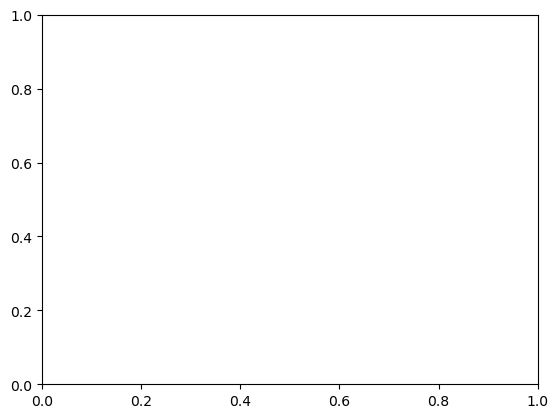

In [38]:
W.show()

In [2]:
import numpy as np

from scipy.integrate import quad_vec
from scipy.linalg import expm
from scipy.optimize import minimize
from scipy.optimize import bisect
from scipy.sparse import bmat

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import ray

k1= 0.1;k2= 0.2
A = np.array([[0,0,1,0],[0,0,0,1],[0,0,-k1,0],[0,0,0,-k2]])
B = np.array([[0,0],[0,0],[k1,0],[0,k2]])
R = np.array([[0.1,0],[0,0.1]])

BRB = B@np.linalg.inv(R)@B.T

In [3]:
def gramian(t):
    def integrand(s):
        return expm(A*s)@B@np.linalg.inv(R)@B.T@expm(A.T*s)
    return quad_vec(integrand, 0, t)[0]

def cost_optimal(state0, state1):
    def cdot(t):
        x = state1-expm(A*t)@state0
        G = gramian(t)
        if np.linalg.det(G) == 0:
            # G = G + np.eye(4)
            print(G)
        d = np.linalg.inv(G)@x
        return 1-d.T@BRB@d
    t_star = bisect(cdot, 0, 100)
    def cost(t):
        x = state1-expm(A*t)@state0
        G = gramian(t)
        return t + x.T@np.linalg.inv(G)@x
    return cost(t_star), t_star

In [4]:
A@A@A@A

array([[ 0.    ,  0.    , -0.001 ,  0.    ],
       [ 0.    ,  0.    ,  0.    , -0.008 ],
       [ 0.    ,  0.    ,  0.0001,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.0016]])